# Nessesery libraries and functions 

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import time

c:\Users\ADMIN\anaconda3\envs\mediapipe\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
# def create_time_sample(X_train_data, Y_train_data, sample_size, seed):
#     return np.array([X_train_data[i:i+sample_size] for i in range(X_train_data.shape[0]-sample_size)]), np.array(Y_train_data[sample_size:])

def train_model(X, Y, X_test, Y_test, model_type, epochs, sample_size, hidden_units, seed):
    np.random.seed(seed)
    tf.random.set_seed(seed)
    scaler = StandardScaler()

    X = scaler.fit_transform(X)
    X_test = scaler.transform(X_test)

    X, Y= np.array([X[i:i+sample_size] for i in range(X.shape[0]-sample_size)]), np.array(Y[sample_size:])
    X_test, Y_test= np.array([X_test[i:i+sample_size] for i in range(X_test.shape[0]-sample_size)]), np.array(Y_test[sample_size:])

    if model_type=="RNN":
        model = Sequential([SimpleRNN(hidden_units, activation='softmax', input_shape=(sample_size, 99))])  # 5 klas wyjściowych
        model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

    elif model_type=="GRU":
        model = Sequential([GRU(hidden_units, activation='softmax', input_shape=(sample_size, 99))])  # 5 klas wyjściowych
        model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

    elif model_type=="LSTM":
        model = Sequential([LSTM(hidden_units, activation='softmax', input_shape=(sample_size, 99))])  # 5 klas wyjściowych
        model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

    training_time=time.time()
    history=model.fit(X, Y, validation_data=(X_test, Y_test), epochs=epochs)
    training_time=time.time()-training_time
    output_time=time.time()
    example_n=10
    for example in range(example_n):
        model.predict(X_test[example].reshape(1,sample_size, 99))
    output_time=(time.time()-output_time)/example_n
    return history, training_time, output_time

# Load data

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from IPython.display import clear_output

X_train_data_0=pd.read_csv("data/big_dataset/data_3D/train/train_2.csv").drop(columns=["Unnamed: 0"])
# X_train_data_0=pd.read_csv("data/small_dataset/data_3D/test/test.csv").drop(columns=["Unnamed: 0"])
# data/small_dataset/data_3D/test/Main/
# Simulate the provided data in a DataFrame format for simplicity
columns = [f"{axis}_{i}" for i in range(33) for axis in ['X', 'Y', 'Z']]


# Function to visualize the 3D scatter plot for each frame
def plot_3d_frames(data):
    num_frames = data.shape[0]  # Number of rows (frames)
    num_points = 33  # Number of points per frame (X, Y, Z for each point)
    
    
    for frame in range(num_frames):
        fig = plt.figure(figsize=(8, 8))
        ax = fig.add_subplot(111, projection='3d')

        ax.clear()
        ax.set_title(f"Frame {frame + 1}")
        ax.set_xlabel('X-axis')
        ax.set_ylabel('Y-axis')
        ax.set_zlabel('Z-axis')
        ax.set_xlim(-10, 50)
        ax.set_ylim(-10, 50)
        ax.set_zlim(-10, 50)
        
        # Extract coordinates for the current frame
        x = data.iloc[frame, 0::3].values
        y = data.iloc[frame, 1::3].values
        z = data.iloc[frame, 2::3].values
        
        ax.scatter(x, y, z, c='blue', marker='o')
        # plt.pause(0.5)  # Pause to create an animation effect
        print("z")
        ax.set_xlim(0, 2)  # Zakres dla osi X
        ax.set_ylim(0, 2)  # Zakres dla osi Y
        ax.set_zlim(0, 2)  # Zakres dla osi Z
        clear_output(wait=True)

        plt.show()


# Call the function to visualize
plot_3d_frames(X_train_data_0[15000:15100])


KeyboardInterrupt: 

In [123]:
X_train_data_0=pd.read_csv("data/big_dataset/data_3D/train/train_0.csv").drop(columns=["Unnamed: 0"])
display(X_train_data_0)
x = X_train_data_0.iloc[0, 0::3].values
x

,X_0,Y_0,Z_0,X_1,Y_1,Z_1,X_2,Y_2,Z_2,X_3,...,Z_29,X_30,Y_30,Z_30,X_31,Y_31,Z_31,X_32,Y_32,Z_32
0,2.828839,0.423392,0.415314,3.233280,0.515086,0.279445,3.382928,0.548685,0.230653,3.543431,...,0.719133,1.741720,0.205445,0.740747,1.511687,0.103929,0.696268,1.845736,0.155022,0.681697
1,1.381691,0.097386,0.866872,1.377327,0.095385,0.872432,1.375127,0.093936,0.873326,1.374142,...,0.673280,1.591470,0.135298,0.674425,1.434330,0.078734,0.674250,1.570873,0.132920,0.682585
2,1.304942,0.084829,0.885109,1.299574,0.082430,0.891857,1.293062,0.079867,0.894292,1.288177,...,0.796927,2.348281,0.303343,0.772202,0.266334,-0.197001,0.571566,1.103173,0.045387,0.666031
3,1.295548,0.098427,0.881159,1.293603,0.097135,0.886935,1.289219,0.095386,0.888658,1.284589,...,0.633161,1.205666,0.053165,0.653815,1.084993,0.010385,0.640754,1.195926,0.073491,0.667534
4,1.233472,0.105397,0.894467,1.229241,0.103987,0.901779,1.219025,0.101584,0.905282,1.210588,...,0.678169,1.101435,0.042771,0.648668,1.274713,0.081070,0.683361,1.152987,0.076003,0.664949
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4766,2.317302,0.309504,0.643538,2.313569,0.307280,0.643267,2.316313,0.306923,0.642431,2.320777,...,1.060804,3.341572,0.547258,1.055337,2.700192,0.371493,0.943436,2.822642,0.424563,0.981415
4767,1.581848,0.137443,0.806834,1.585438,0.139748,0.809331,1.585699,0.140636,0.809379,1.585758,...,0.660654,1.486057,0.111432,0.658573,1.472528,0.120384,0.647124,1.511167,0.118216,0.649486
4768,1.542999,0.132477,0.816417,1.544777,0.134457,0.819477,1.544370,0.135407,0.819678,1.544015,...,0.650224,1.446323,0.104081,0.657922,1.428872,0.116722,0.645561,1.464923,0.108703,0.649595
4769,1.497666,0.126031,0.828038,1.500766,0.128275,0.831251,1.499311,0.129216,0.831841,1.497928,...,0.674566,1.441490,0.107233,0.673190,1.388296,0.107508,0.662384,1.443153,0.104456,0.666870


array([2.82883853, 3.23327978, 3.38292825, 3.54343084, 2.93684161,
       2.90630661, 2.88708254, 3.86437224, 2.78735425, 3.07301175,
       2.84687149, 8.08363729, 2.36095769, 2.54092619, 2.1666969 ,
       1.62118433, 1.95248774, 1.61333875, 1.92216573, 1.61469203,
       1.89706205, 1.61589158, 1.90457549, 1.95481545, 2.08648503,
       1.6919258 , 1.9175492 , 1.59394256, 1.79114908, 1.59791161,
       1.74171986, 1.51168675, 1.8457357 ])

In [9]:
X_train_data_0=pd.read_csv("data/big_dataset/data_3D/train/train_2.csv").drop(columns=["Unnamed: 0"])
X_train_data_0=np.array(X_train_data_0)[2500:13040]

X_train_data_1=pd.read_csv("data/big_dataset/data_3D/train/train_1.csv").drop(columns=["Unnamed: 0"])
X_train_data_1=np.array(X_train_data_1)[2500:10250]

X_train_data=np.concatenate((X_train_data_0, X_train_data_1), axis=0, out=None, dtype=None)

X_test_data_0=pd.read_csv("data/big_dataset/data_3D/train/train_2.csv").drop(columns=["Unnamed: 0"])
X_test_data_0=np.array(X_test_data_0)[:2500]

X_test_data_1=pd.read_csv("data/big_dataset/data_3D/train/train_1.csv").drop(columns=["Unnamed: 0"])
X_test_data_1=np.array(X_test_data_1)[:2500]

X_test_data=np.concatenate((X_test_data_0, X_test_data_1), axis=0, out=None, dtype=None)

In [10]:
X_train_data_1
len(X_test_data)

5000

In [11]:
print(len(X_train_data))
# print(len(Y_train_data_1))

18290


In [12]:
# for cat in categories:
#     with open(file_path+cat+".txt", "r", encoding="utf-8") as file:
#         content = file.read() 
    # print(len(content.split("\n")))


In [13]:
#train
file_path = "data/big_dataset/data_3D/train/Main_2/"
categories=["inne", "odkładanie kartonu", "pakowanie", "rozpakowywanie", "sięganie po karton"]
Y_train_data_0=[None for e in range(X_train_data_0.shape[0])]
for cat in categories:
    with open(file_path+cat+".txt", "r", encoding="utf-8") as file:
        content = file.read() 
    for id, example in enumerate(content.split("\n")[2500:13040]):

        if example[-2:]==" 1":
            Y_train_data_0[id]=categories.index(cat)

file_path = "data/big_dataset/data_3D/train/Main_1/"
categories=["inne", "odkładanie kartonu", "pakowanie", "rozpakowywanie", "sięganie po karton"]
Y_train_data_1=[None for e in range(X_train_data_1.shape[0])]
for cat in categories:
    with open(file_path+cat+".txt", "r", encoding="utf-8") as file:
        content = file.read() 
    for id, example in enumerate(content.split("\n")[2500:10250]):
        if example[-2:]==" 1":
            Y_train_data_1[id]=categories.index(cat)
Y_train_data=np.concatenate((Y_train_data_0, Y_train_data_1), axis=0, out=None, dtype=None)

#test
file_path = "data/big_dataset/data_3D/train/Main_2/"
categories=["inne", "odkładanie kartonu", "pakowanie", "rozpakowywanie", "sięganie po karton"]
Y_test_data_0=[None for e in range(X_test_data_0.shape[0])]
for cat in categories:
    with open(file_path+cat+".txt", "r", encoding="utf-8") as file:
        content = file.read() 
    for id, example in enumerate(content.split("\n")[:2500]):
        if example[-2:]==" 1":
            Y_test_data_0[id]=categories.index(cat)

file_path = "data/big_dataset/data_3D/train/Main_1/"
categories=["inne", "odkładanie kartonu", "pakowanie", "rozpakowywanie", "sięganie po karton"]
Y_test_data_1=[None for e in range(X_test_data_1.shape[0])]
for cat in categories:
    with open(file_path+cat+".txt", "r", encoding="utf-8") as file:
        content = file.read() 
    for id, example in enumerate(content.split("\n")[:2500]):
        if example[-2:]==" 1":
            Y_test_data_1[id]=categories.index(cat)
Y_test_data=np.concatenate((Y_test_data_0, Y_test_data_1), axis=0, out=None, dtype=None)


In [14]:
print(len(X_train_data))
print(len(X_test_data))
print(len(Y_train_data))
print(len(Y_test_data))

18290
5000
18290
5000


In [19]:
Y_test_data.index(None)
# len(Y_train_data_0)

AttributeError: 'numpy.ndarray' object has no attribute 'index'

# Training model

In [22]:
import json
path="data/small_dataset/data_3D/train_history/model_type_GRU hidden_units_32 sample_size_3.json"
with open(path, "r") as file:
    data = json.load(file)
l=data['val_accuracy']
max_val=max(l)
print(l.index(max_val))
print(l)
print(l[l.index(max_val)])

48
[0.33372366428375244, 0.3852458894252777, 0.4156908690929413, 0.43325525522232056, 0.4250585436820984, 0.4291568994522095, 0.4303278625011444, 0.432084321975708, 0.43735364079475403, 0.4420374631881714, 0.4396955370903015, 0.44262295961380005, 0.443793922662735, 0.4508196711540222, 0.4531615972518921, 0.4525761008262634, 0.4590163826942444, 0.4590163826942444, 0.4625292718410492, 0.466042160987854, 0.46896955370903015, 0.47072598338127136, 0.47423887252807617, 0.48067915439605713, 0.477751761674881, 0.477751761674881, 0.48009368777275085, 0.48770493268966675, 0.483021080493927, 0.4871194362640381, 0.4865339696407318, 0.488290399312973, 0.4888758659362793, 0.49004682898521423, 0.488290399312973, 0.49004682898521423, 0.488290399312973, 0.4871194362640381, 0.48770493268966675, 0.4865339696407318, 0.48770493268966675, 0.49004682898521423, 0.4871194362640381, 0.48946136236190796, 0.49004682898521423, 0.4888758659362793, 0.4888758659362793, 0.48770493268966675, 0.4906323254108429, 0.48887

In [ ]:
Epoch 12/100
468/468 [==============================] - 98s 210ms/step - loss: 0.6334 - accuracy: 0.7526 - val_loss: 0.7063 - val_accuracy: 0.7169
Epoch 13/100
468/468 [==============================] - 99s 212ms/step - loss: 0.6069 - accuracy: 0.7648 - val_loss: 0.6704 - val_accuracy: 0.7377
Epoch 14/100
468/468 [==============================] - 97s 208ms/step - loss: 0.5776 - accuracy: 0.7799 - val_loss: 0.6416 - val_accuracy: 0.7415
Epoch 15/100
468/468 [==============================] - 100s 214ms/step - loss: 0.5503 - accuracy: 0.7947 - val_loss: 0.6242 - val_accuracy: 0.7508
Epoch 16/100
468/468 [==============================] - 93s 198ms/step - loss: 0.5233 - accuracy: 0.8082 - val_loss: 0.5954 - val_accuracy: 0.7683
Epoch 17/100
468/468 [==============================] - 80s 170ms/step - loss: 0.4988 - accuracy: 0.8205 - val_loss: 0.5804 - val_accuracy: 0.7853
Epoch 18/100
468/468 [==============================] - 77s 165ms/step - loss: 0.4811 - accuracy: 0.8280 - val_loss: 0.5659 - val_accuracy: 0.7909
Epoch 19/100
468/468 [==============================] - 83s 177ms/step - loss: 0.4643 - accuracy: 0.8350 - val_loss: 0.5484 - val_accuracy: 0.7954
Epoch 20/100
468/468 [==============================] - 79s 168ms/step - loss: 0.4501 - accuracy: 0.8404 - val_loss: 0.5435 - val_accuracy: 0.8020
Epoch 21/100
468/468 [==============================] - 83s 176ms/step - loss: 0.4367 - accuracy: 0.8449 - val_loss: 0.5334 - val_accuracy: 0.8067
Epoch 22/100
468/468 [==============================] - 79s 169ms/step - loss: 0.4249 - accuracy: 0.8492 - val_loss: 0.5324 - val_accuracy: 0.8071
Epoch 23/100
468/468 [==============================] - 80s 172ms/step - loss: 0.4132 - accuracy: 0.8523 - val_loss: 0.5283 - val_accuracy: 0.8050
Epoch 24/100
468/468 [==============================] - 81s 173ms/step - loss: 0.4037 - accuracy: 0.8555 - val_loss: 0.5415 - val_accuracy: 0.8032
Epoch 25/100
468/468 [==============================] - 83s 178ms/step - loss: 0.3942 - accuracy: 0.8580 - val_loss: 0.5444 - val_accuracy: 0.8022

In [21]:
sample_size=40
# X, Y=create_time_sample(X_train_data, Y_train_data, sample_size, 42) #dodać normalizacje danych X
# X_test, Y_test=create_time_sample(X_test_data, Y_test_data, sample_size, 42) #dodać normalizacje danych X
history, training_time, output_time = train_model(X=X_train_data, Y=Y_train_data, X_test=X_test_data, Y_test=Y_test_data, model_type="GRU", epochs=100, sample_size=sample_size, hidden_units=32, seed=42)

Epoch 1/100
571/571 [==============================] - 133s 228ms/step - loss: 1.7587 - accuracy: 0.4484 - val_loss: 1.1616 - val_accuracy: 0.5562
Epoch 2/100
571/571 [==============================] - 149s 261ms/step - loss: 1.0583 - accuracy: 0.5910 - val_loss: 1.0032 - val_accuracy: 0.6046
Epoch 3/100
571/571 [==============================] - 145s 254ms/step - loss: 0.9451 - accuracy: 0.6242 - val_loss: 0.9348 - val_accuracy: 0.6181
Epoch 4/100
571/571 [==============================] - 177s 309ms/step - loss: 0.8771 - accuracy: 0.6482 - val_loss: 0.8939 - val_accuracy: 0.6266
Epoch 5/100
571/571 [==============================] - 145s 254ms/step - loss: 0.8240 - accuracy: 0.6633 - val_loss: 0.8579 - val_accuracy: 0.6339
Epoch 6/100
571/571 [==============================] - 125s 220ms/step - loss: 0.7801 - accuracy: 0.6840 - val_loss: 0.8226 - val_accuracy: 0.6560
Epoch 7/100
571/571 [==============================] - 158s 278ms/step - loss: 0.7373 - accuracy: 0.7062 - val_loss: 0

KeyboardInterrupt: 

In [ ]:
sample size = 40, big
Epoch 1/100
468/468 [==============================] - 76s 160ms/step - loss: 1.8983 - accuracy: 0.4314 - val_loss: 1.2325 - val_accuracy: 0.5458
Epoch 2/100
468/468 [==============================] - 75s 160ms/step - loss: 1.1103 - accuracy: 0.5850 - val_loss: 1.0395 - val_accuracy: 0.6022
Epoch 3/100
468/468 [==============================] - 74s 159ms/step - loss: 0.9804 - accuracy: 0.6133 - val_loss: 0.9731 - val_accuracy: 0.6167
Epoch 4/100
468/468 [==============================] - 98s 209ms/step - loss: 0.9107 - accuracy: 0.6310 - val_loss: 0.9282 - val_accuracy: 0.6171
Epoch 5/100
468/468 [==============================] - 100s 214ms/step - loss: 0.8594 - accuracy: 0.6483 - val_loss: 0.8867 - val_accuracy: 0.6347
Epoch 6/100
468/468 [==============================] - 106s 226ms/step - loss: 0.8127 - accuracy: 0.6654 - val_loss: 0.8543 - val_accuracy: 0.6429
Epoch 7/100
468/468 [==============================] - 102s 218ms/step - loss: 0.7737 - accuracy: 0.6807 - val_loss: 0.8243 - val_accuracy: 0.6536
Epoch 8/100
468/468 [==============================] - 93s 199ms/step - loss: 0.7428 - accuracy: 0.6941 - val_loss: 0.8036 - val_accuracy: 0.6754
Epoch 9/100
468/468 [==============================] - 95s 202ms/step - loss: 0.7153 - accuracy: 0.7078 - val_loss: 0.7813 - val_accuracy: 0.6835
Epoch 10/100
468/468 [==============================] - 88s 188ms/step - loss: 0.6878 - accuracy: 0.7227 - val_loss: 0.7515 - val_accuracy: 0.7002
Epoch 11/100
468/468 [==============================] - 102s 219ms/step - loss: 0.6616 - accuracy: 0.7392 - val_loss: 0.7229 - val_accuracy: 0.7008
Epoch 12/100
468/468 [==============================] - 98s 210ms/step - loss: 0.6334 - accuracy: 0.7526 - val_loss: 0.7063 - val_accuracy: 0.7169
Epoch 13/100
468/468 [==============================] - 99s 212ms/step - loss: 0.6069 - accuracy: 0.7648 - val_loss: 0.6704 - val_accuracy: 0.7377
Epoch 14/100
468/468 [==============================] - 97s 208ms/step - loss: 0.5776 - accuracy: 0.7799 - val_loss: 0.6416 - val_accuracy: 0.7415
Epoch 15/100
468/468 [==============================] - 100s 214ms/step - loss: 0.5503 - accuracy: 0.7947 - val_loss: 0.6242 - val_accuracy: 0.7508
Epoch 16/100
468/468 [==============================] - 93s 198ms/step - loss: 0.5233 - accuracy: 0.8082 - val_loss: 0.5954 - val_accuracy: 0.7683
Epoch 17/100
468/468 [==============================] - 80s 170ms/step - loss: 0.4988 - accuracy: 0.8205 - val_loss: 0.5804 - val_accuracy: 0.7853
Epoch 18/100
468/468 [==============================] - 77s 165ms/step - loss: 0.4811 - accuracy: 0.8280 - val_loss: 0.5659 - val_accuracy: 0.7909
Epoch 19/100
468/468 [==============================] - 83s 177ms/step - loss: 0.4643 - accuracy: 0.8350 - val_loss: 0.5484 - val_accuracy: 0.7954
Epoch 20/100
468/468 [==============================] - 79s 168ms/step - loss: 0.4501 - accuracy: 0.8404 - val_loss: 0.5435 - val_accuracy: 0.8020
Epoch 21/100
468/468 [==============================] - 83s 176ms/step - loss: 0.4367 - accuracy: 0.8449 - val_loss: 0.5334 - val_accuracy: 0.8067
Epoch 22/100
468/468 [==============================] - 79s 169ms/step - loss: 0.4249 - accuracy: 0.8492 - val_loss: 0.5324 - val_accuracy: 0.8071
Epoch 23/100
468/468 [==============================] - 80s 172ms/step - loss: 0.4132 - accuracy: 0.8523 - val_loss: 0.5283 - val_accuracy: 0.8050
Epoch 24/100
468/468 [==============================] - 81s 173ms/step - loss: 0.4037 - accuracy: 0.8555 - val_loss: 0.5415 - val_accuracy: 0.8032
Epoch 25/100
468/468 [==============================] - 83s 178ms/step - loss: 0.3942 - accuracy: 0.8580 - val_loss: 0.5444 - val_accuracy: 0.8022
Epoch 26/100
468/468 [==============================] - 80s 170ms/step - loss: 0.3941 - accuracy: 0.8558 - val_loss: 0.5267 - val_accuracy: 0.8105
Epoch 27/100
468/468 [==============================] - 82s 176ms/step - loss: 0.3839 - accuracy: 0.8608 - val_loss: 0.5230 - val_accuracy: 0.8089
Epoch 28/100
468/468 [==============================] - 81s 174ms/step - loss: 0.3757 - accuracy: 0.8668 - val_loss: 0.5170 - val_accuracy: 0.8119
Epoch 29/100
468/468 [==============================] - 76s 162ms/step - loss: 0.3718 - accuracy: 0.8648 - val_loss: 0.5122 - val_accuracy: 0.8159
Epoch 30/100
468/468 [==============================] - 78s 167ms/step - loss: 0.3696 - accuracy: 0.8656 - val_loss: 0.5151 - val_accuracy: 0.8177
Epoch 31/100
468/468 [==============================] - 78s 167ms/step - loss: 0.3608 - accuracy: 0.8689 - val_loss: 0.5036 - val_accuracy: 0.8181
Epoch 32/100
468/468 [==============================] - 81s 174ms/step - loss: 0.3561 - accuracy: 0.8715 - val_loss: 0.5271 - val_accuracy: 0.8117
Epoch 33/100
468/468 [==============================] - 82s 176ms/step - loss: 0.3525 - accuracy: 0.8723 - val_loss: 0.5172 - val_accuracy: 0.8220
Epoch 34/100
468/468 [==============================] - 81s 172ms/step - loss: 0.3483 - accuracy: 0.8733 - val_loss: 0.5202 - val_accuracy: 0.8147
Epoch 35/100
468/468 [==============================] - 82s 175ms/step - loss: 0.3488 - accuracy: 0.8740 - val_loss: 0.4851 - val_accuracy: 0.8298
Epoch 36/100
468/468 [==============================] - 81s 173ms/step - loss: 0.3441 - accuracy: 0.8765 - val_loss: 0.4879 - val_accuracy: 0.8230
Epoch 37/100
468/468 [==============================] - 82s 175ms/step - loss: 0.3370 - accuracy: 0.8792 - val_loss: 0.5307 - val_accuracy: 0.8125
Epoch 38/100
468/468 [==============================] - 82s 174ms/step - loss: 0.3355 - accuracy: 0.8794 - val_loss: 0.4915 - val_accuracy: 0.8252
Epoch 39/100
468/468 [==============================] - 86s 183ms/step - loss: 0.3312 - accuracy: 0.8799 - val_loss: 0.4728 - val_accuracy: 0.8341
Epoch 40/100
468/468 [==============================] - 85s 181ms/step - loss: 0.3255 - accuracy: 0.8816 - val_loss: 0.4672 - val_accuracy: 0.8385
Epoch 41/100
468/468 [==============================] - 81s 172ms/step - loss: 0.3244 - accuracy: 0.8834 - val_loss: 0.4677 - val_accuracy: 0.8371
Epoch 42/100
468/468 [==============================] - 83s 176ms/step - loss: 0.3245 - accuracy: 0.8831 - val_loss: 0.4785 - val_accuracy: 0.8323
Epoch 43/100
468/468 [==============================] - 83s 177ms/step - loss: 0.3173 - accuracy: 0.8860 - val_loss: 0.4723 - val_accuracy: 0.8331
Epoch 44/100
468/468 [==============================] - 81s 174ms/step - loss: 0.3310 - accuracy: 0.8801 - val_loss: 0.4496 - val_accuracy: 0.8417
Epoch 45/100
468/468 [==============================] - 81s 172ms/step - loss: 0.3159 - accuracy: 0.8869 - val_loss: 0.4458 - val_accuracy: 0.8464
Epoch 46/100
468/468 [==============================] - 84s 179ms/step - loss: 0.3121 - accuracy: 0.8892 - val_loss: 0.4685 - val_accuracy: 0.8343
Epoch 47/100
468/468 [==============================] - 102s 219ms/step - loss: 0.3073 - accuracy: 0.8896 - val_loss: 0.4585 - val_accuracy: 0.8377
Epoch 48/100
468/468 [==============================] - 102s 217ms/step - loss: 0.3073 - accuracy: 0.8892 - val_loss: 0.4522 - val_accuracy: 0.8413
Epoch 49/100
468/468 [==============================] - 97s 208ms/step - loss: 0.3103 - accuracy: 0.8873 - val_loss: 0.4470 - val_accuracy: 0.8407
Epoch 50/100
468/468 [==============================] - 84s 180ms/step - loss: 0.3017 - accuracy: 0.8910 - val_loss: 0.4403 - val_accuracy: 0.8468
Epoch 51/100
468/468 [==============================] - 76s 162ms/step - loss: 0.2984 - accuracy: 0.8926 - val_loss: 0.4470 - val_accuracy: 0.8361
Epoch 52/100
468/468 [==============================] - 77s 164ms/step - loss: 0.2976 - accuracy: 0.8927 - val_loss: 0.4363 - val_accuracy: 0.8474
Epoch 53/100
468/468 [==============================] - 77s 165ms/step - loss: 0.2970 - accuracy: 0.8946 - val_loss: 0.4392 - val_accuracy: 0.8431
Epoch 54/100
468/468 [==============================] - 78s 166ms/step - loss: 0.2948 - accuracy: 0.8959 - val_loss: 0.4287 - val_accuracy: 0.8504
Epoch 55/100
468/468 [==============================] - 78s 168ms/step - loss: 0.2901 - accuracy: 0.8973 - val_loss: 0.4457 - val_accuracy: 0.8401
Epoch 56/100
468/468 [==============================] - 79s 169ms/step - loss: 0.2878 - accuracy: 0.8980 - val_loss: 0.4285 - val_accuracy: 0.8462
Epoch 57/100
468/468 [==============================] - 78s 167ms/step - loss: 0.2858 - accuracy: 0.8981 - val_loss: 0.4322 - val_accuracy: 0.8452
Epoch 58/100
468/468 [==============================] - 79s 168ms/step - loss: 0.2866 - accuracy: 0.8973 - val_loss: 0.4446 - val_accuracy: 0.8375
Epoch 59/100
468/468 [==============================] - 78s 167ms/step - loss: 0.2819 - accuracy: 0.8990 - val_loss: 0.4343 - val_accuracy: 0.8458
Epoch 60/100
468/468 [==============================] - 78s 166ms/step - loss: 0.2799 - accuracy: 0.9013 - val_loss: 0.4351 - val_accuracy: 0.8405
Epoch 61/100
468/468 [==============================] - 78s 167ms/step - loss: 0.2765 - accuracy: 0.9032 - val_loss: 0.4324 - val_accuracy: 0.8438
Epoch 62/100
468/468 [==============================] - 78s 166ms/step - loss: 0.2763 - accuracy: 0.9027 - val_loss: 0.4297 - val_accuracy: 0.8486
Epoch 63/100
468/468 [==============================] - 91s 194ms/step - loss: 0.2727 - accuracy: 0.9035 - val_loss: 0.4266 - val_accuracy: 0.8488
Epoch 64/100
468/468 [==============================] - 86s 184ms/step - loss: 0.2795 - accuracy: 0.9007 - val_loss: 0.4366 - val_accuracy: 0.8460
Epoch 65/100
468/468 [==============================] - 87s 186ms/step - loss: 0.2729 - accuracy: 0.9022 - val_loss: 0.4305 - val_accuracy: 0.8460
Epoch 66/100
468/468 [==============================] - 86s 185ms/step - loss: 0.2677 - accuracy: 0.9064 - val_loss: 0.4397 - val_accuracy: 0.8431
Epoch 67/100
468/468 [==============================] - 87s 186ms/step - loss: 0.2663 - accuracy: 0.9059 - val_loss: 0.4351 - val_accuracy: 0.8464
Epoch 68/100
468/468 [==============================] - 79s 170ms/step - loss: 0.2637 - accuracy: 0.9072 - val_loss: 0.4432 - val_accuracy: 0.8484
Epoch 69/100
468/468 [==============================] - 79s 168ms/step - loss: 0.2656 - accuracy: 0.9052 - val_loss: 0.4250 - val_accuracy: 0.8524
Epoch 70/100
468/468 [==============================] - 78s 167ms/step - loss: 0.2643 - accuracy: 0.9072 - val_loss: 0.4130 - val_accuracy: 0.8510
Epoch 71/100
468/468 [==============================] - 78s 166ms/step - loss: 0.2677 - accuracy: 0.9056 - val_loss: 0.4699 - val_accuracy: 0.8321
Epoch 72/100
468/468 [==============================] - 88s 188ms/step - loss: 0.2941 - accuracy: 0.8949 - val_loss: 0.4513 - val_accuracy: 0.8423
Epoch 73/100
468/468 [==============================] - 88s 189ms/step - loss: 0.2895 - accuracy: 0.8984 - val_loss: 0.4174 - val_accuracy: 0.8524
Epoch 74/100
468/468 [==============================] - 87s 186ms/step - loss: 0.2701 - accuracy: 0.9037 - val_loss: 0.4328 - val_accuracy: 0.8476
Epoch 75/100
468/468 [==============================] - 93s 198ms/step - loss: 0.2613 - accuracy: 0.9069 - val_loss: 0.4193 - val_accuracy: 0.8524
Epoch 76/100
468/468 [==============================] - 89s 189ms/step - loss: 0.2565 - accuracy: 0.9088 - val_loss: 0.4419 - val_accuracy: 0.8438
Epoch 77/100
468/468 [==============================] - 94s 201ms/step - loss: 0.2557 - accuracy: 0.9103 - val_loss: 0.4316 - val_accuracy: 0.8504
Epoch 78/100
468/468 [==============================] - 85s 181ms/step - loss: 0.2549 - accuracy: 0.9112 - val_loss: 0.4504 - val_accuracy: 0.8385
Epoch 79/100
468/468 [==============================] - 89s 191ms/step - loss: 0.2539 - accuracy: 0.9114 - val_loss: 0.4346 - val_accuracy: 0.8506
Epoch 80/100
468/468 [==============================] - 84s 179ms/step - loss: 0.2539 - accuracy: 0.9113 - val_loss: 0.4295 - val_accuracy: 0.8482
Epoch 81/100
468/468 [==============================] - 84s 180ms/step - loss: 0.2506 - accuracy: 0.9132 - val_loss: 0.4378 - val_accuracy: 0.8462
Epoch 82/100
468/468 [==============================] - 86s 184ms/step - loss: 0.2513 - accuracy: 0.9134 - val_loss: 0.4403 - val_accuracy: 0.8504
Epoch 83/100
468/468 [==============================] - 87s 186ms/step - loss: 0.2593 - accuracy: 0.9106 - val_loss: 0.4296 - val_accuracy: 0.8516
Epoch 84/100
468/468 [==============================] - 85s 182ms/step - loss: 0.2507 - accuracy: 0.9140 - val_loss: 0.4434 - val_accuracy: 0.8494
Epoch 85/100
468/468 [==============================] - 85s 181ms/step - loss: 0.2523 - accuracy: 0.9137 - val_loss: 0.4339 - val_accuracy: 0.8486
Epoch 86/100
468/468 [==============================] - 89s 191ms/step - loss: 0.2498 - accuracy: 0.9130 - val_loss: 0.4644 - val_accuracy: 0.8456
Epoch 87/100
468/468 [==============================] - 82s 174ms/step - loss: 0.2491 - accuracy: 0.9148 - val_loss: 0.4457 - val_accuracy: 0.8482
Epoch 88/100
468/468 [==============================] - 81s 172ms/step - loss: 0.2460 - accuracy: 0.9152 - val_loss: 0.4497 - val_accuracy: 0.8454
Epoch 89/100
468/468 [==============================] - 95s 202ms/step - loss: 0.2478 - accuracy: 0.9155 - val_loss: 0.4645 - val_accuracy: 0.8415
Epoch 90/100
468/468 [==============================] - 92s 197ms/step - loss: 0.2456 - accuracy: 0.9158 - val_loss: 0.4462 - val_accuracy: 0.8508
Epoch 91/100
468/468 [==============================] - 91s 195ms/step - loss: 0.2444 - accuracy: 0.9164 - val_loss: 0.4648 - val_accuracy: 0.8452
Epoch 92/100
468/468 [==============================] - 88s 188ms/step - loss: 0.2502 - accuracy: 0.9141 - val_loss: 0.4330 - val_accuracy: 0.8548
Epoch 93/100
468/468 [==============================] - 87s 187ms/step - loss: 0.2489 - accuracy: 0.9144 - val_loss: 0.4419 - val_accuracy: 0.8514
Epoch 94/100
468/468 [==============================] - 87s 187ms/step - loss: 0.2410 - accuracy: 0.9167 - val_loss: 0.4478 - val_accuracy: 0.8514
Epoch 95/100
468/468 [==============================] - 82s 176ms/step - loss: 0.2455 - accuracy: 0.9154 - val_loss: 0.4559 - val_accuracy: 0.8458
Epoch 96/100
468/468 [==============================] - 82s 176ms/step - loss: 0.2410 - accuracy: 0.9195 - val_loss: 0.4465 - val_accuracy: 0.8534
Epoch 97/100
468/468 [==============================] - 82s 176ms/step - loss: 0.2408 - accuracy: 0.9182 - val_loss: 0.4815 - val_accuracy: 0.8351
Epoch 98/100
468/468 [==============================] - 84s 180ms/step - loss: 0.2378 - accuracy: 0.9198 - val_loss: 0.4501 - val_accuracy: 0.8518
Epoch 99/100
468/468 [==============================] - 86s 184ms/step - loss: 0.2463 - accuracy: 0.9166 - val_loss: 0.5271 - val_accuracy: 0.8276
Epoch 100/100


In [ ]:
sample = 3, big
Epoch 1/100
469/469 [==============================] - 11s 19ms/step - loss: 1.9247 - accuracy: 0.4141 - val_loss: 1.3302 - val_accuracy: 0.5073
Epoch 2/100
469/469 [==============================] - 11s 22ms/step - loss: 1.1855 - accuracy: 0.5244 - val_loss: 1.1044 - val_accuracy: 0.5503
Epoch 3/100
469/469 [==============================] - 14s 30ms/step - loss: 1.0592 - accuracy: 0.5480 - val_loss: 1.0371 - val_accuracy: 0.5681
Epoch 4/100
469/469 [==============================] - 19s 40ms/step - loss: 1.0017 - accuracy: 0.5650 - val_loss: 0.9869 - val_accuracy: 0.5795
Epoch 5/100
469/469 [==============================] - 19s 41ms/step - loss: 0.9606 - accuracy: 0.5820 - val_loss: 0.9555 - val_accuracy: 0.5954
Epoch 6/100
469/469 [==============================] - 12s 26ms/step - loss: 0.9304 - accuracy: 0.5952 - val_loss: 0.9339 - val_accuracy: 0.6114
Epoch 7/100
469/469 [==============================] - 9s 20ms/step - loss: 0.9067 - accuracy: 0.6065 - val_loss: 0.9097 - val_accuracy: 0.6190
Epoch 8/100
469/469 [==============================] - 9s 20ms/step - loss: 0.8867 - accuracy: 0.6165 - val_loss: 0.8947 - val_accuracy: 0.6376
Epoch 9/100
469/469 [==============================] - 10s 21ms/step - loss: 0.8694 - accuracy: 0.6270 - val_loss: 0.8809 - val_accuracy: 0.6470
Epoch 10/100
469/469 [==============================] - 10s 21ms/step - loss: 0.8531 - accuracy: 0.6374 - val_loss: 0.8721 - val_accuracy: 0.6612
Epoch 11/100
469/469 [==============================] - 12s 26ms/step - loss: 0.8390 - accuracy: 0.6503 - val_loss: 0.8556 - val_accuracy: 0.6632
Epoch 12/100
469/469 [==============================] - 13s 28ms/step - loss: 0.8252 - accuracy: 0.6566 - val_loss: 0.8480 - val_accuracy: 0.6622
Epoch 13/100
469/469 [==============================] - 11s 23ms/step - loss: 0.8140 - accuracy: 0.6645 - val_loss: 0.8380 - val_accuracy: 0.6702
Epoch 14/100
469/469 [==============================] - 10s 21ms/step - loss: 0.8020 - accuracy: 0.6684 - val_loss: 0.8280 - val_accuracy: 0.6784
Epoch 15/100
469/469 [==============================] - 13s 27ms/step - loss: 0.7897 - accuracy: 0.6769 - val_loss: 0.8158 - val_accuracy: 0.6856
Epoch 16/100
469/469 [==============================] - 10s 22ms/step - loss: 0.7771 - accuracy: 0.6820 - val_loss: 0.8109 - val_accuracy: 0.6858
Epoch 17/100
469/469 [==============================] - 11s 23ms/step - loss: 0.7653 - accuracy: 0.6866 - val_loss: 0.8004 - val_accuracy: 0.6878
Epoch 18/100
469/469 [==============================] - 12s 26ms/step - loss: 0.7537 - accuracy: 0.6919 - val_loss: 0.7987 - val_accuracy: 0.6852
Epoch 19/100
469/469 [==============================] - 12s 25ms/step - loss: 0.7448 - accuracy: 0.6949 - val_loss: 0.7857 - val_accuracy: 0.6944
Epoch 20/100
469/469 [==============================] - 10s 22ms/step - loss: 0.7343 - accuracy: 0.6989 - val_loss: 0.7888 - val_accuracy: 0.6966
Epoch 21/100
469/469 [==============================] - 11s 24ms/step - loss: 0.7265 - accuracy: 0.7045 - val_loss: 0.7761 - val_accuracy: 0.6962
Epoch 22/100
469/469 [==============================] - 12s 25ms/step - loss: 0.7174 - accuracy: 0.7095 - val_loss: 0.7681 - val_accuracy: 0.7014
Epoch 23/100
469/469 [==============================] - 11s 24ms/step - loss: 0.7102 - accuracy: 0.7109 - val_loss: 0.7674 - val_accuracy: 0.6970
Epoch 24/100
469/469 [==============================] - 13s 27ms/step - loss: 0.7041 - accuracy: 0.7149 - val_loss: 0.7629 - val_accuracy: 0.6978
Epoch 25/100
469/469 [==============================] - 11s 23ms/step - loss: 0.6972 - accuracy: 0.7176 - val_loss: 0.7600 - val_accuracy: 0.7052
Epoch 26/100
469/469 [==============================] - 13s 27ms/step - loss: 0.6915 - accuracy: 0.7174 - val_loss: 0.7524 - val_accuracy: 0.7042
Epoch 27/100
469/469 [==============================] - 14s 30ms/step - loss: 0.6858 - accuracy: 0.7215 - val_loss: 0.7482 - val_accuracy: 0.7050
Epoch 28/100
469/469 [==============================] - 13s 28ms/step - loss: 0.6802 - accuracy: 0.7259 - val_loss: 0.7522 - val_accuracy: 0.7030
Epoch 29/100
469/469 [==============================] - 11s 23ms/step - loss: 0.6754 - accuracy: 0.7260 - val_loss: 0.7512 - val_accuracy: 0.7080
Epoch 30/100
469/469 [==============================] - 10s 22ms/step - loss: 0.6698 - accuracy: 0.7291 - val_loss: 0.7469 - val_accuracy: 0.7090
Epoch 31/100
469/469 [==============================] - 10s 21ms/step - loss: 0.6659 - accuracy: 0.7315 - val_loss: 0.7365 - val_accuracy: 0.7096
Epoch 32/100
469/469 [==============================] - 13s 28ms/step - loss: 0.6604 - accuracy: 0.7327 - val_loss: 0.7325 - val_accuracy: 0.7112
Epoch 33/100
469/469 [==============================] - 10s 22ms/step - loss: 0.6563 - accuracy: 0.7357 - val_loss: 0.7362 - val_accuracy: 0.7122
Epoch 34/100
469/469 [==============================] - 15s 32ms/step - loss: 0.6527 - accuracy: 0.7387 - val_loss: 0.7341 - val_accuracy: 0.7070
Epoch 35/100
469/469 [==============================] - 14s 29ms/step - loss: 0.6489 - accuracy: 0.7397 - val_loss: 0.7339 - val_accuracy: 0.7142
Epoch 36/100
469/469 [==============================] - 11s 23ms/step - loss: 0.6434 - accuracy: 0.7408 - val_loss: 0.7304 - val_accuracy: 0.7178
Epoch 37/100
469/469 [==============================] - 10s 22ms/step - loss: 0.6408 - accuracy: 0.7445 - val_loss: 0.7235 - val_accuracy: 0.7126
Epoch 38/100
469/469 [==============================] - 11s 23ms/step - loss: 0.6378 - accuracy: 0.7445 - val_loss: 0.7362 - val_accuracy: 0.7186
Epoch 39/100
469/469 [==============================] - 11s 24ms/step - loss: 0.6328 - accuracy: 0.7477 - val_loss: 0.7286 - val_accuracy: 0.7174
Epoch 40/100
469/469 [==============================] - 11s 24ms/step - loss: 0.6291 - accuracy: 0.7485 - val_loss: 0.7193 - val_accuracy: 0.7226
Epoch 41/100
469/469 [==============================] - 12s 26ms/step - loss: 0.6268 - accuracy: 0.7526 - val_loss: 0.7161 - val_accuracy: 0.7218
Epoch 42/100
469/469 [==============================] - 14s 29ms/step - loss: 0.6233 - accuracy: 0.7513 - val_loss: 0.7176 - val_accuracy: 0.7238
Epoch 43/100
469/469 [==============================] - 18s 38ms/step - loss: 0.6209 - accuracy: 0.7530 - val_loss: 0.7267 - val_accuracy: 0.7212
Epoch 44/100
469/469 [==============================] - 16s 35ms/step - loss: 0.6172 - accuracy: 0.7558 - val_loss: 0.7154 - val_accuracy: 0.7214
Epoch 45/100
469/469 [==============================] - 16s 34ms/step - loss: 0.6139 - accuracy: 0.7562 - val_loss: 0.7180 - val_accuracy: 0.7264
Epoch 46/100
469/469 [==============================] - 15s 32ms/step - loss: 0.6106 - accuracy: 0.7576 - val_loss: 0.7196 - val_accuracy: 0.7298
Epoch 47/100
469/469 [==============================] - 11s 25ms/step - loss: 0.6079 - accuracy: 0.7593 - val_loss: 0.7040 - val_accuracy: 0.7284
Epoch 48/100
469/469 [==============================] - 12s 26ms/step - loss: 0.6044 - accuracy: 0.7612 - val_loss: 0.7065 - val_accuracy: 0.7334
Epoch 49/100
469/469 [==============================] - 16s 34ms/step - loss: 0.6022 - accuracy: 0.7625 - val_loss: 0.7033 - val_accuracy: 0.7346
Epoch 50/100
469/469 [==============================] - 12s 25ms/step - loss: 0.6001 - accuracy: 0.7623 - val_loss: 0.7039 - val_accuracy: 0.7240
Epoch 51/100
469/469 [==============================] - 12s 25ms/step - loss: 0.5975 - accuracy: 0.7656 - val_loss: 0.7204 - val_accuracy: 0.7290
Epoch 52/100
469/469 [==============================] - 12s 26ms/step - loss: 0.5954 - accuracy: 0.7664 - val_loss: 0.6960 - val_accuracy: 0.7348
Epoch 53/100
469/469 [==============================] - 12s 25ms/step - loss: 0.5941 - accuracy: 0.7650 - val_loss: 0.6998 - val_accuracy: 0.7312
Epoch 54/100
469/469 [==============================] - 12s 25ms/step - loss: 0.5895 - accuracy: 0.7688 - val_loss: 0.6985 - val_accuracy: 0.7362
Epoch 55/100
469/469 [==============================] - 12s 26ms/step - loss: 0.5873 - accuracy: 0.7709 - val_loss: 0.6945 - val_accuracy: 0.7344
Epoch 56/100
469/469 [==============================] - 12s 25ms/step - loss: 0.5849 - accuracy: 0.7698 - val_loss: 0.6932 - val_accuracy: 0.7386
Epoch 57/100
469/469 [==============================] - 12s 25ms/step - loss: 0.5832 - accuracy: 0.7728 - val_loss: 0.6878 - val_accuracy: 0.7428
Epoch 58/100
469/469 [==============================] - 12s 25ms/step - loss: 0.5812 - accuracy: 0.7739 - val_loss: 0.6932 - val_accuracy: 0.7440
Epoch 59/100
469/469 [==============================] - 12s 26ms/step - loss: 0.5804 - accuracy: 0.7718 - val_loss: 0.6925 - val_accuracy: 0.7408
Epoch 60/100
469/469 [==============================] - 12s 26ms/step - loss: 0.5762 - accuracy: 0.7767 - val_loss: 0.6895 - val_accuracy: 0.7416
Epoch 61/100
469/469 [==============================] - 13s 27ms/step - loss: 0.5759 - accuracy: 0.7776 - val_loss: 0.6853 - val_accuracy: 0.7384
Epoch 62/100
469/469 [==============================] - 12s 25ms/step - loss: 0.5738 - accuracy: 0.7768 - val_loss: 0.6886 - val_accuracy: 0.7424
Epoch 63/100
469/469 [==============================] - 12s 25ms/step - loss: 0.5727 - accuracy: 0.7783 - val_loss: 0.6879 - val_accuracy: 0.7456
Epoch 64/100
469/469 [==============================] - 12s 26ms/step - loss: 0.5681 - accuracy: 0.7812 - val_loss: 0.6898 - val_accuracy: 0.7446
Epoch 65/100
469/469 [==============================] - 13s 28ms/step - loss: 0.5664 - accuracy: 0.7829 - val_loss: 0.6849 - val_accuracy: 0.7460
Epoch 66/100
469/469 [==============================] - 12s 25ms/step - loss: 0.5656 - accuracy: 0.7812 - val_loss: 0.6852 - val_accuracy: 0.7424
Epoch 67/100
469/469 [==============================] - 13s 27ms/step - loss: 0.5628 - accuracy: 0.7828 - val_loss: 0.6863 - val_accuracy: 0.7501
Epoch 68/100
469/469 [==============================] - 12s 26ms/step - loss: 0.5610 - accuracy: 0.7854 - val_loss: 0.6865 - val_accuracy: 0.7454
Epoch 69/100
469/469 [==============================] - 12s 26ms/step - loss: 0.5596 - accuracy: 0.7858 - val_loss: 0.6851 - val_accuracy: 0.7446
Epoch 70/100
469/469 [==============================] - 12s 26ms/step - loss: 0.5581 - accuracy: 0.7854 - val_loss: 0.6809 - val_accuracy: 0.7511
Epoch 71/100
469/469 [==============================] - 12s 26ms/step - loss: 0.5560 - accuracy: 0.7848 - val_loss: 0.6849 - val_accuracy: 0.7428
Epoch 72/100
469/469 [==============================] - 12s 26ms/step - loss: 0.5553 - accuracy: 0.7881 - val_loss: 0.6770 - val_accuracy: 0.7448
Epoch 73/100
469/469 [==============================] - 12s 26ms/step - loss: 0.5525 - accuracy: 0.7874 - val_loss: 0.6785 - val_accuracy: 0.7519
Epoch 74/100
469/469 [==============================] - 12s 26ms/step - loss: 0.5518 - accuracy: 0.7877 - val_loss: 0.6760 - val_accuracy: 0.7525
Epoch 75/100
469/469 [==============================] - 12s 25ms/step - loss: 0.5493 - accuracy: 0.7893 - val_loss: 0.6767 - val_accuracy: 0.7519
Epoch 76/100
469/469 [==============================] - 13s 27ms/step - loss: 0.5492 - accuracy: 0.7901 - val_loss: 0.6768 - val_accuracy: 0.7496
Epoch 77/100
469/469 [==============================] - 13s 27ms/step - loss: 0.5465 - accuracy: 0.7915 - val_loss: 0.6741 - val_accuracy: 0.7496
Epoch 78/100
469/469 [==============================] - 12s 26ms/step - loss: 0.5458 - accuracy: 0.7894 - val_loss: 0.6731 - val_accuracy: 0.7537
Epoch 79/100
469/469 [==============================] - 12s 26ms/step - loss: 0.5443 - accuracy: 0.7907 - val_loss: 0.6761 - val_accuracy: 0.7525
Epoch 80/100
469/469 [==============================] - 12s 26ms/step - loss: 0.5413 - accuracy: 0.7928 - val_loss: 0.6797 - val_accuracy: 0.7541
Epoch 81/100
469/469 [==============================] - 13s 28ms/step - loss: 0.5412 - accuracy: 0.7918 - val_loss: 0.6811 - val_accuracy: 0.7492
Epoch 82/100
469/469 [==============================] - 13s 28ms/step - loss: 0.5391 - accuracy: 0.7942 - val_loss: 0.6718 - val_accuracy: 0.7527
Epoch 83/100
469/469 [==============================] - 12s 25ms/step - loss: 0.5366 - accuracy: 0.7951 - val_loss: 0.6774 - val_accuracy: 0.7561
Epoch 84/100
469/469 [==============================] - 13s 27ms/step - loss: 0.5358 - accuracy: 0.7949 - val_loss: 0.6706 - val_accuracy: 0.7557
Epoch 85/100
469/469 [==============================] - 12s 25ms/step - loss: 0.5360 - accuracy: 0.7940 - val_loss: 0.6773 - val_accuracy: 0.7476
Epoch 86/100
469/469 [==============================] - 12s 25ms/step - loss: 0.5335 - accuracy: 0.7942 - val_loss: 0.6677 - val_accuracy: 0.7561
Epoch 87/100
469/469 [==============================] - 12s 26ms/step - loss: 0.5326 - accuracy: 0.7990 - val_loss: 0.6693 - val_accuracy: 0.7557
Epoch 88/100
469/469 [==============================] - 12s 25ms/step - loss: 0.5312 - accuracy: 0.7990 - val_loss: 0.6724 - val_accuracy: 0.7567
Epoch 89/100
469/469 [==============================] - 13s 27ms/step - loss: 0.5291 - accuracy: 0.7988 - val_loss: 0.6707 - val_accuracy: 0.7563
Epoch 90/100
469/469 [==============================] - 12s 26ms/step - loss: 0.5291 - accuracy: 0.7982 - val_loss: 0.6617 - val_accuracy: 0.7533
Epoch 91/100
469/469 [==============================] - 12s 26ms/step - loss: 0.5268 - accuracy: 0.8002 - val_loss: 0.6689 - val_accuracy: 0.7593
Epoch 92/100
469/469 [==============================] - 12s 26ms/step - loss: 0.5262 - accuracy: 0.7993 - val_loss: 0.6709 - val_accuracy: 0.7547
Epoch 93/100
469/469 [==============================] - 12s 26ms/step - loss: 0.5248 - accuracy: 0.8006 - val_loss: 0.6762 - val_accuracy: 0.7581
Epoch 94/100
469/469 [==============================] - 13s 27ms/step - loss: 0.5240 - accuracy: 0.8002 - val_loss: 0.6651 - val_accuracy: 0.7557
Epoch 95/100
469/469 [==============================] - 12s 25ms/step - loss: 0.5219 - accuracy: 0.8035 - val_loss: 0.6678 - val_accuracy: 0.7533
Epoch 96/100
469/469 [==============================] - 12s 25ms/step - loss: 0.5207 - accuracy: 0.8030 - val_loss: 0.6705 - val_accuracy: 0.7515
Epoch 97/100
469/469 [==============================] - 12s 26ms/step - loss: 0.5197 - accuracy: 0.8048 - val_loss: 0.6686 - val_accuracy: 0.7462
Epoch 98/100
469/469 [==============================] - 13s 27ms/step - loss: 0.5190 - accuracy: 0.8043 - val_loss: 0.6719 - val_accuracy: 0.7549
Epoch 99/100
469/469 [==============================] - 12s 26ms/step - loss: 0.5180 - accuracy: 0.8022 - val_loss: 0.6673 - val_accuracy: 0.7577
Epoch 100/100
469/469 [==============================] - 13s 28ms/step - loss: 0.5160 - accuracy: 0.8052 - val_loss: 0.6731 - val_accuracy: 0.7543


In [ ]:
sample_size=3 small
Epoch 1/100
157/157 [==============================] - 6s 22ms/step - loss: 2.4328 - accuracy: 0.3234 - val_loss: 1.8362 - val_accuracy: 0.4421
Epoch 2/100
157/157 [==============================] - 3s 20ms/step - loss: 1.5555 - accuracy: 0.4725 - val_loss: 1.3947 - val_accuracy: 0.5203
Epoch 3/100
157/157 [==============================] - 3s 19ms/step - loss: 1.2516 - accuracy: 0.5329 - val_loss: 1.2200 - val_accuracy: 0.5491
Epoch 4/100
157/157 [==============================] - 3s 21ms/step - loss: 1.1151 - accuracy: 0.5593 - val_loss: 1.1267 - val_accuracy: 0.5649
Epoch 5/100
157/157 [==============================] - 3s 20ms/step - loss: 1.0401 - accuracy: 0.5799 - val_loss: 1.0723 - val_accuracy: 0.5777
Epoch 6/100
157/157 [==============================] - 3s 20ms/step - loss: 0.9882 - accuracy: 0.5940 - val_loss: 1.0469 - val_accuracy: 0.5836
Epoch 7/100
157/157 [==============================] - 3s 20ms/step - loss: 0.9528 - accuracy: 0.6046 - val_loss: 1.0102 - val_accuracy: 0.5896
Epoch 8/100
157/157 [==============================] - 3s 20ms/step - loss: 0.9248 - accuracy: 0.6108 - val_loss: 0.9887 - val_accuracy: 0.6044
Epoch 9/100
157/157 [==============================] - 3s 20ms/step - loss: 0.8979 - accuracy: 0.6186 - val_loss: 0.9698 - val_accuracy: 0.6062
Epoch 10/100
157/157 [==============================] - 3s 21ms/step - loss: 0.8782 - accuracy: 0.6218 - val_loss: 0.9569 - val_accuracy: 0.6124
Epoch 11/100
157/157 [==============================] - 3s 20ms/step - loss: 0.8588 - accuracy: 0.6344 - val_loss: 0.9361 - val_accuracy: 0.6222
Epoch 12/100
157/157 [==============================] - 4s 28ms/step - loss: 0.8433 - accuracy: 0.6418 - val_loss: 0.9260 - val_accuracy: 0.6162
Epoch 13/100
157/157 [==============================] - 3s 22ms/step - loss: 0.8298 - accuracy: 0.6458 - val_loss: 0.9141 - val_accuracy: 0.6296
Epoch 14/100
157/157 [==============================] - 3s 21ms/step - loss: 0.8172 - accuracy: 0.6510 - val_loss: 0.9010 - val_accuracy: 0.6368
Epoch 15/100
157/157 [==============================] - 3s 20ms/step - loss: 0.8041 - accuracy: 0.6588 - val_loss: 0.8941 - val_accuracy: 0.6378
Epoch 16/100
157/157 [==============================] - 3s 20ms/step - loss: 0.7927 - accuracy: 0.6662 - val_loss: 0.8805 - val_accuracy: 0.6414
Epoch 17/100
157/157 [==============================] - 3s 20ms/step - loss: 0.7826 - accuracy: 0.6742 - val_loss: 0.8738 - val_accuracy: 0.6504
Epoch 18/100
157/157 [==============================] - 3s 21ms/step - loss: 0.7733 - accuracy: 0.6742 - val_loss: 0.8668 - val_accuracy: 0.6546
Epoch 19/100
157/157 [==============================] - 4s 22ms/step - loss: 0.7628 - accuracy: 0.6858 - val_loss: 0.8605 - val_accuracy: 0.6526
Epoch 20/100
157/157 [==============================] - 3s 21ms/step - loss: 0.7554 - accuracy: 0.6834 - val_loss: 0.8546 - val_accuracy: 0.6580
Epoch 21/100
157/157 [==============================] - 3s 21ms/step - loss: 0.7479 - accuracy: 0.6878 - val_loss: 0.8448 - val_accuracy: 0.6602
Epoch 22/100
157/157 [==============================] - 3s 22ms/step - loss: 0.7389 - accuracy: 0.6934 - val_loss: 0.8446 - val_accuracy: 0.6636
Epoch 23/100
157/157 [==============================] - 3s 21ms/step - loss: 0.7320 - accuracy: 0.6970 - val_loss: 0.8405 - val_accuracy: 0.6688
Epoch 24/100
157/157 [==============================] - 3s 21ms/step - loss: 0.7248 - accuracy: 0.7016 - val_loss: 0.8316 - val_accuracy: 0.6662
Epoch 25/100
157/157 [==============================] - 3s 21ms/step - loss: 0.7174 - accuracy: 0.7012 - val_loss: 0.8309 - val_accuracy: 0.6694
Epoch 26/100
157/157 [==============================] - 3s 21ms/step - loss: 0.7094 - accuracy: 0.7136 - val_loss: 0.8464 - val_accuracy: 0.6570
Epoch 27/100
157/157 [==============================] - 3s 22ms/step - loss: 0.7048 - accuracy: 0.7094 - val_loss: 0.8236 - val_accuracy: 0.6718
Epoch 28/100
157/157 [==============================] - 3s 21ms/step - loss: 0.6972 - accuracy: 0.7166 - val_loss: 0.8181 - val_accuracy: 0.6744
Epoch 29/100
157/157 [==============================] - 3s 21ms/step - loss: 0.6905 - accuracy: 0.7228 - val_loss: 0.8137 - val_accuracy: 0.6758
Epoch 30/100
157/157 [==============================] - 3s 21ms/step - loss: 0.6852 - accuracy: 0.7260 - val_loss: 0.8153 - val_accuracy: 0.6838
Epoch 31/100
157/157 [==============================] - 3s 21ms/step - loss: 0.6767 - accuracy: 0.7328 - val_loss: 0.8102 - val_accuracy: 0.6808
Epoch 32/100
157/157 [==============================] - 3s 21ms/step - loss: 0.6718 - accuracy: 0.7306 - val_loss: 0.8088 - val_accuracy: 0.6758
Epoch 33/100
157/157 [==============================] - 3s 21ms/step - loss: 0.6634 - accuracy: 0.7364 - val_loss: 0.8070 - val_accuracy: 0.6786
Epoch 34/100
157/157 [==============================] - 3s 22ms/step - loss: 0.6601 - accuracy: 0.7380 - val_loss: 0.8019 - val_accuracy: 0.6886
Epoch 35/100
157/157 [==============================] - 3s 21ms/step - loss: 0.6527 - accuracy: 0.7454 - val_loss: 0.7990 - val_accuracy: 0.6862
Epoch 36/100
157/157 [==============================] - 3s 21ms/step - loss: 0.6472 - accuracy: 0.7436 - val_loss: 0.8035 - val_accuracy: 0.6852
Epoch 37/100
157/157 [==============================] - 3s 21ms/step - loss: 0.6422 - accuracy: 0.7452 - val_loss: 0.7966 - val_accuracy: 0.6880
Epoch 38/100
157/157 [==============================] - 3s 21ms/step - loss: 0.6361 - accuracy: 0.7490 - val_loss: 0.7959 - val_accuracy: 0.6920
Epoch 39/100
157/157 [==============================] - 3s 21ms/step - loss: 0.6323 - accuracy: 0.7521 - val_loss: 0.7938 - val_accuracy: 0.6890
Epoch 40/100
157/157 [==============================] - 3s 22ms/step - loss: 0.6271 - accuracy: 0.7537 - val_loss: 0.7958 - val_accuracy: 0.6956
Epoch 41/100
157/157 [==============================] - 3s 21ms/step - loss: 0.6229 - accuracy: 0.7589 - val_loss: 0.7945 - val_accuracy: 0.6942
Epoch 42/100
157/157 [==============================] - 4s 23ms/step - loss: 0.6167 - accuracy: 0.7665 - val_loss: 0.7885 - val_accuracy: 0.6988
Epoch 43/100
157/157 [==============================] - 3s 21ms/step - loss: 0.6127 - accuracy: 0.7597 - val_loss: 0.7881 - val_accuracy: 0.7022
Epoch 44/100
157/157 [==============================] - 3s 21ms/step - loss: 0.6072 - accuracy: 0.7613 - val_loss: 0.7884 - val_accuracy: 0.6932
Epoch 45/100
157/157 [==============================] - 3s 22ms/step - loss: 0.6031 - accuracy: 0.7675 - val_loss: 0.7815 - val_accuracy: 0.7014
Epoch 46/100
157/157 [==============================] - 3s 21ms/step - loss: 0.5997 - accuracy: 0.7681 - val_loss: 0.7854 - val_accuracy: 0.6936
Epoch 47/100
157/157 [==============================] - 3s 21ms/step - loss: 0.5947 - accuracy: 0.7725 - val_loss: 0.7844 - val_accuracy: 0.7072
Epoch 48/100
157/157 [==============================] - 4s 26ms/step - loss: 0.5901 - accuracy: 0.7711 - val_loss: 0.7799 - val_accuracy: 0.7050
Epoch 49/100
157/157 [==============================] - 3s 22ms/step - loss: 0.5870 - accuracy: 0.7743 - val_loss: 0.7791 - val_accuracy: 0.7004
Epoch 50/100
157/157 [==============================] - 3s 22ms/step - loss: 0.5830 - accuracy: 0.7777 - val_loss: 0.7861 - val_accuracy: 0.7070
Epoch 51/100
157/157 [==============================] - 4s 24ms/step - loss: 0.5780 - accuracy: 0.7737 - val_loss: 0.7851 - val_accuracy: 0.7048
Epoch 52/100
157/157 [==============================] - 4s 23ms/step - loss: 0.5758 - accuracy: 0.7747 - val_loss: 0.7738 - val_accuracy: 0.7114
Epoch 53/100
157/157 [==============================] - 4s 23ms/step - loss: 0.5698 - accuracy: 0.7813 - val_loss: 0.7688 - val_accuracy: 0.7124
Epoch 54/100
157/157 [==============================] - 4s 23ms/step - loss: 0.5666 - accuracy: 0.7803 - val_loss: 0.7673 - val_accuracy: 0.7134
Epoch 55/100
157/157 [==============================] - 4s 24ms/step - loss: 0.5643 - accuracy: 0.7827 - val_loss: 0.7679 - val_accuracy: 0.7124
Epoch 56/100
157/157 [==============================] - 4s 27ms/step - loss: 0.5605 - accuracy: 0.7851 - val_loss: 0.7745 - val_accuracy: 0.7084
Epoch 57/100
157/157 [==============================] - 4s 26ms/step - loss: 0.5583 - accuracy: 0.7855 - val_loss: 0.7714 - val_accuracy: 0.7100
Epoch 58/100
157/157 [==============================] - 4s 26ms/step - loss: 0.5536 - accuracy: 0.7859 - val_loss: 0.7654 - val_accuracy: 0.7176
Epoch 59/100
157/157 [==============================] - 4s 23ms/step - loss: 0.5505 - accuracy: 0.7893 - val_loss: 0.7597 - val_accuracy: 0.7128
Epoch 60/100
157/157 [==============================] - 4s 23ms/step - loss: 0.5459 - accuracy: 0.7895 - val_loss: 0.7695 - val_accuracy: 0.7120
Epoch 61/100
157/157 [==============================] - 3s 21ms/step - loss: 0.5442 - accuracy: 0.7893 - val_loss: 0.7615 - val_accuracy: 0.7188
Epoch 62/100
157/157 [==============================] - 4s 23ms/step - loss: 0.5410 - accuracy: 0.7969 - val_loss: 0.7627 - val_accuracy: 0.7166
Epoch 63/100
157/157 [==============================] - 4s 22ms/step - loss: 0.5373 - accuracy: 0.7967 - val_loss: 0.7600 - val_accuracy: 0.7168
Epoch 64/100
157/157 [==============================] - 3s 21ms/step - loss: 0.5347 - accuracy: 0.7993 - val_loss: 0.7616 - val_accuracy: 0.7226
Epoch 65/100
157/157 [==============================] - 3s 22ms/step - loss: 0.5320 - accuracy: 0.7973 - val_loss: 0.7632 - val_accuracy: 0.7130
Epoch 66/100
157/157 [==============================] - 3s 22ms/step - loss: 0.5287 - accuracy: 0.8005 - val_loss: 0.7677 - val_accuracy: 0.7244
Epoch 67/100
157/157 [==============================] - 3s 22ms/step - loss: 0.5277 - accuracy: 0.8037 - val_loss: 0.7541 - val_accuracy: 0.7158
Epoch 68/100
157/157 [==============================] - 4s 23ms/step - loss: 0.5242 - accuracy: 0.8005 - val_loss: 0.7640 - val_accuracy: 0.7188
Epoch 69/100
157/157 [==============================] - 4s 24ms/step - loss: 0.5211 - accuracy: 0.8005 - val_loss: 0.7580 - val_accuracy: 0.7252
Epoch 70/100
157/157 [==============================] - 4s 23ms/step - loss: 0.5194 - accuracy: 0.7997 - val_loss: 0.7571 - val_accuracy: 0.7218
Epoch 71/100
157/157 [==============================] - 4s 22ms/step - loss: 0.5174 - accuracy: 0.8031 - val_loss: 0.7534 - val_accuracy: 0.7188
Epoch 72/100
157/157 [==============================] - 3s 21ms/step - loss: 0.5148 - accuracy: 0.8049 - val_loss: 0.7503 - val_accuracy: 0.7256
Epoch 73/100
157/157 [==============================] - 3s 22ms/step - loss: 0.5114 - accuracy: 0.8023 - val_loss: 0.7513 - val_accuracy: 0.7232
Epoch 74/100
157/157 [==============================] - 3s 22ms/step - loss: 0.5112 - accuracy: 0.8051 - val_loss: 0.7549 - val_accuracy: 0.7242
Epoch 75/100
157/157 [==============================] - 4s 22ms/step - loss: 0.5079 - accuracy: 0.8107 - val_loss: 0.7537 - val_accuracy: 0.7268
Epoch 76/100
157/157 [==============================] - 4s 26ms/step - loss: 0.5046 - accuracy: 0.8087 - val_loss: 0.7533 - val_accuracy: 0.7294
Epoch 77/100
157/157 [==============================] - 4s 24ms/step - loss: 0.5030 - accuracy: 0.8121 - val_loss: 0.7487 - val_accuracy: 0.7332
Epoch 78/100
157/157 [==============================] - 4s 27ms/step - loss: 0.5014 - accuracy: 0.8099 - val_loss: 0.7593 - val_accuracy: 0.7242
Epoch 79/100
157/157 [==============================] - 4s 26ms/step - loss: 0.4996 - accuracy: 0.8095 - val_loss: 0.7559 - val_accuracy: 0.7248
Epoch 80/100
157/157 [==============================] - 4s 25ms/step - loss: 0.4956 - accuracy: 0.8127 - val_loss: 0.7484 - val_accuracy: 0.7248
Epoch 81/100
157/157 [==============================] - 4s 23ms/step - loss: 0.4951 - accuracy: 0.8119 - val_loss: 0.7566 - val_accuracy: 0.7358
Epoch 82/100
157/157 [==============================] - 4s 23ms/step - loss: 0.4921 - accuracy: 0.8135 - val_loss: 0.7643 - val_accuracy: 0.7292
Epoch 83/100
157/157 [==============================] - 4s 23ms/step - loss: 0.4903 - accuracy: 0.8149 - val_loss: 0.7533 - val_accuracy: 0.7306
Epoch 84/100
157/157 [==============================] - 4s 25ms/step - loss: 0.4884 - accuracy: 0.8113 - val_loss: 0.7659 - val_accuracy: 0.7332
Epoch 85/100
157/157 [==============================] - 4s 23ms/step - loss: 0.4861 - accuracy: 0.8159 - val_loss: 0.7578 - val_accuracy: 0.7294
Epoch 86/100
157/157 [==============================] - 4s 26ms/step - loss: 0.4852 - accuracy: 0.8123 - val_loss: 0.7593 - val_accuracy: 0.7264
Epoch 87/100
157/157 [==============================] - 4s 24ms/step - loss: 0.4823 - accuracy: 0.8199 - val_loss: 0.7521 - val_accuracy: 0.7306
Epoch 88/100
157/157 [==============================] - 4s 23ms/step - loss: 0.4819 - accuracy: 0.8179 - val_loss: 0.7534 - val_accuracy: 0.7346
Epoch 89/100
157/157 [==============================] - 4s 24ms/step - loss: 0.4823 - accuracy: 0.8133 - val_loss: 0.7560 - val_accuracy: 0.7354
Epoch 90/100
157/157 [==============================] - 4s 23ms/step - loss: 0.4783 - accuracy: 0.8163 - val_loss: 0.7630 - val_accuracy: 0.7318
Epoch 91/100
157/157 [==============================] - 4s 23ms/step - loss: 0.4772 - accuracy: 0.8195 - val_loss: 0.7750 - val_accuracy: 0.7356
Epoch 92/100
157/157 [==============================] - 4s 24ms/step - loss: 0.4762 - accuracy: 0.8213 - val_loss: 0.7547 - val_accuracy: 0.7332
Epoch 93/100
157/157 [==============================] - 4s 25ms/step - loss: 0.4731 - accuracy: 0.8241 - val_loss: 0.7652 - val_accuracy: 0.7358
Epoch 94/100
157/157 [==============================] - 4s 22ms/step - loss: 0.4710 - accuracy: 0.8217 - val_loss: 0.7653 - val_accuracy: 0.7292
Epoch 95/100
157/157 [==============================] - 4s 23ms/step - loss: 0.4719 - accuracy: 0.8165 - val_loss: 0.7507 - val_accuracy: 0.7342
Epoch 96/100
157/157 [==============================] - 4s 22ms/step - loss: 0.4699 - accuracy: 0.8201 - val_loss: 0.7677 - val_accuracy: 0.7320
Epoch 97/100
157/157 [==============================] - 3s 22ms/step - loss: 0.4682 - accuracy: 0.8211 - val_loss: 0.7661 - val_accuracy: 0.7386
Epoch 98/100
157/157 [==============================] - 4s 22ms/step - loss: 0.4674 - accuracy: 0.8231 - val_loss: 0.7651 - val_accuracy: 0.7372
Epoch 99/100
157/157 [==============================] - 4s 23ms/step - loss: 0.4668 - accuracy: 0.8185 - val_loss: 0.7609 - val_accuracy: 0.7320
Epoch 100/100
157/157 [==============================] - 4s 25ms/step - loss: 0.4653 - accuracy: 0.8215 - val_loss: 0.7573 - val_accuracy: 0.7344


NameError: name 'l' is not defined

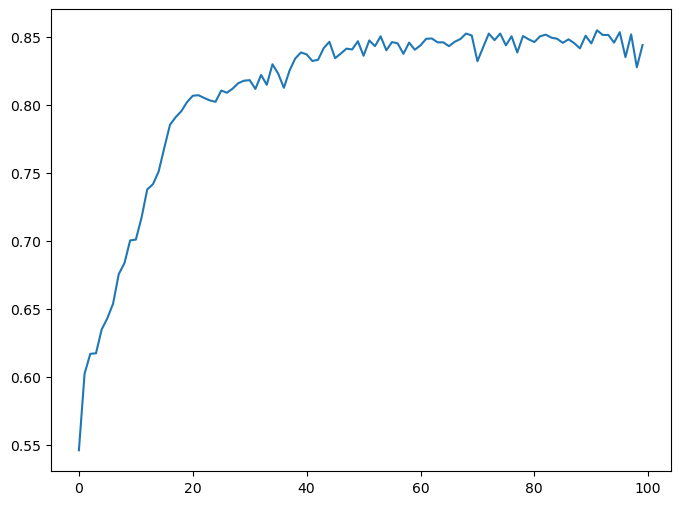

In [13]:
plt.figure(figsize=(8, 6))
# plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.plot(l, label='Validation Accuracy')
# plt.ylim(0.2, 0.6)
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


In [15]:
id

4880